### Exercise: Image Handling & Processing

Read through the description of the exercises and select appropriate tools / libraries. Implement the solution below the respective exercise description. Feel free to use the internet, especially the documentation of the presented libraries may be helpful.

#### Exercise 1.1
Edge detectors can be a useful tool to identify features within an image. For example, the resulting features can later be used in a machine learning anaylsis to create a predictive model which associates certain edge patterns to outcome values such as the identification of a car in an image. Oftentimes, some data preparation is needed before conducting any kind of feature extraction. This may include steps such as conversion to gray scale and application of blurring filters to reduce noise. In the following exercise you will perform an edge detector based feature extraction including preprocessing.

* Load the image "taipei101.jpg" from the folder "Data"
* Verify that the image loading was successful
* Resize the image to half of its original size, convert it to gray scale and apply any blur filter
* Design a filter which is able to capture horizontal edges
* Create a numpy array which represents the designed filter
* Create a vertical filter by rotating the horizontal filter by 90 degrees
* Apply the two filters to the preprocessed image
* Display the resized version of the original image and the two filtered images simultaneously to visually compare them

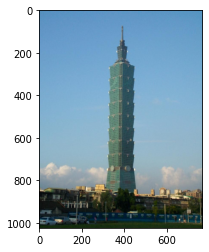

In [59]:
from  PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import numpy as np
from skimage import filters
import cv2

#Load Image
raw_image = Image.open("./data/taipei101.jpg")
#Verify Load
plt.imshow(raw_image)



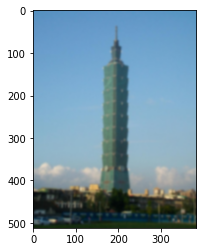

In [60]:
#Resize and Blur
new_size = np.array(raw_image.size)
new_size = new_size/2
new_size = new_size.astype("int32")
new_size
small_image = raw_image.resize(new_size)
small_image = small_image.filter(ImageFilter.GaussianBlur(2))
plt.imshow(small_image)

In [61]:
hor_kernel = np.array([[-1,-2,-1], 
                       [0,0,0],
                       [1,2,1]])
vert_kernel = np.rot90(hor_kernel)
vert_kernel


array([[-1,  0,  1],
       [-2,  0,  2],
       [-1,  0,  1]])

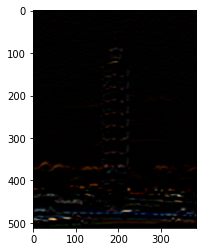

In [62]:
im_array = np.asarray(small_image)
hor_kernel_image = cv2.filter2D(im_array, -1, hor_kernel)
hor_kernel_image = Image.fromarray(hor_kernel_image)
plt.imshow(hor_kernel_image)

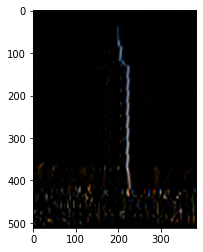

In [63]:
im_array = np.asarray(small_image)
vert_kernel_image = cv2.filter2D(im_array, -1, vert_kernel)
vert_kernel_image = Image.fromarray(vert_kernel_image)
plt.imshow(vert_kernel_image)

#### Exercise 1.2

Have a look at the image where the vertical filter has been applied. Note that the filter you used only captues one of the two vertical outlines of the skyscraper (either the left outlining or the right outlining). This results from the fact that an edge detection filter only captures pixel intensity gradients from either low-to-high or high-to-low (or in this case, sky-to-tower and tower-to-sky). In the following exercise, you will implement a solution to detect both gradients directions using edge detectors.

* Design another horizontal filter which captures the reverse gradient of pixel intensities compared to your initial horizontal filter and create a numpy array representing the filter
* Do the same for the vertical filter
* Create two images, one for vertical and one for horizontal filtering, which display the opposing gradients (e.g. merge the two images resulting from the horizontal/vertical filters in the same channel (gray))
* Further, create two images, one for vertical and one for horizontal filtering, which display the opposing gradients in two different colors (e.g. merge the two images along two different color channels)
* Display all four merged images simultaneously to visually compare them

In [64]:
hor_kernel_reverse = np.rot90(vert_kernel)
vert_kernel_reverse = np.rot90(hor_kernel_reverse)
hor_kernel_reverse

array([[ 1,  2,  1],
       [ 0,  0,  0],
       [-1, -2, -1]])

In [65]:
vert_kernel_reverse

array([[ 1,  0, -1],
       [ 2,  0, -2],
       [ 1,  0, -1]])

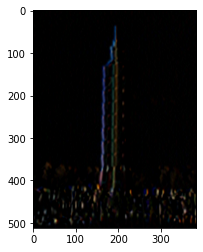

In [66]:
im_array = np.asarray(small_image)
vert_reverse_kernel_image = cv2.filter2D(im_array, -1, vert_kernel_reverse)
vert_reverse_kernel_image = Image.fromarray(vert_reverse_kernel_image)
plt.imshow(vert_reverse_kernel_image)

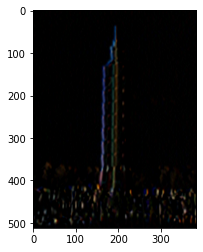

In [67]:
im_array = np.asarray(small_image)
hor_reverse_kernel_image = cv2.filter2D(im_array, -1, hor_kernel_reverse)
hor_reverse_kernel_image = Image.fromarray(hor_reverse_kernel_image)
plt.imshow(vert_reverse_kernel_image)

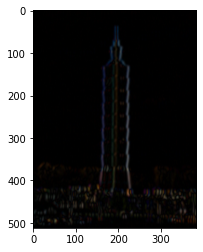

In [68]:
out_vert = Image.blend(vert_reverse_kernel_image,vert_kernel_image, alpha=0.5 )
plt.imshow(out_vert)

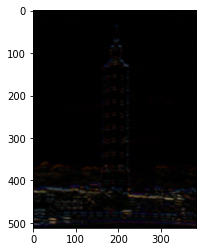

In [69]:
out_horr = Image.blend(hor_reverse_kernel_image,hor_kernel_image, alpha=0.5 )
plt.imshow(out_horr)

#### Exercise 2

When performing computer vision tasks using traditional techniques, features are extracted from images and usually stored in a tabular data format. In this exercise, you will be supplied with a table containing already extracted image features belonging to two groups. You will visualize some information on the extracted features on order to find hints on the most discriminative feature in the image groups.

* Go to the folder "Data" using your file explorer
* Have a look at the CSV file "metastasis.csv" in order to understand its formatting
* Load the table to a pandas data frame
* Display the table to check whether the loading worked as intended
* Count the samples belonging to each group in the "Metastasis" column
* Select a visualization technique which allows you to plot the distribution of values for a feature
* Create four plots, one for each feature ("Sphericity", "Homogeneity", "Age", "HER2_mutation"). Use the selected visualization technique to display the overlap of distributions for the two groups ("positive" and "negative") at each feature
* Judging from the plots only, which feature is most likely to be able to differentiate between samples of group "positive" and "negative" in the "Metastasis" column when using 1 splitting point for separation?

In [100]:
import pandas as pd
data = pd.read_csv("./data/metastasis.csv", sep=";")

In [101]:
data

,ID,Sphericity,Homogeneity,Age,HER2_expression,Metastasis
0,0,0.88,140,60,0.9452,positive
1,1,0.84,111,65,0.8234,negative
2,2,0.72,199,55,1.1231,positive
3,3,0.92,150,55,1.2021,negative
4,4,0.55,175,78,1.1111,positive
5,5,0.91,120,80,0.8321,negative
6,6,0.90,177,82,0.7998,positive
7,7,0.83,189,85,1.1023,positive
8,8,0.76,100,76,0.9982,negative
9,9,0.70,111,81,1.0130,negative


In [102]:
data.groupby(['Metastasis']).count()

,ID,Sphericity,Homogeneity,Age,HER2_expression
Metastasis,,,,,
negative,5,5,5,5,5
positive,5,5,5,5,5


In [103]:
data1 = data[data["Metastasis"] == "positive"]
data2 = data[data["Metastasis"] == "negative"]

In [104]:
features = data.columns
features


Index(['ID', 'Sphericity', 'Homogeneity', 'Age', 'HER2_expression',
       'Metastasis'],
      dtype='object')

e:\programming\python\kagel_work\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


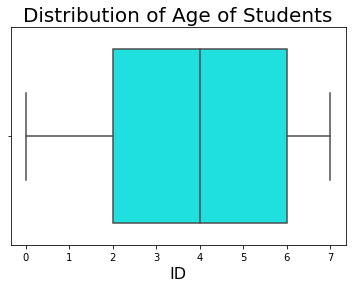

e:\programming\python\kagel_work\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


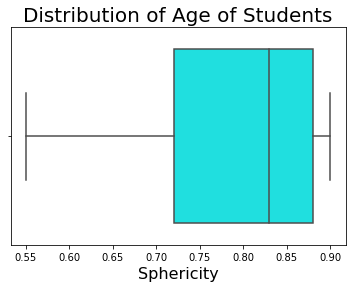

e:\programming\python\kagel_work\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


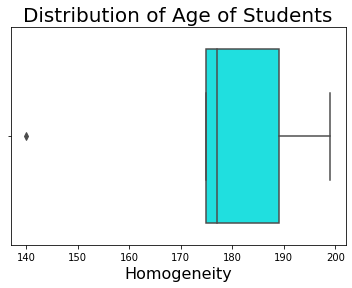

e:\programming\python\kagel_work\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


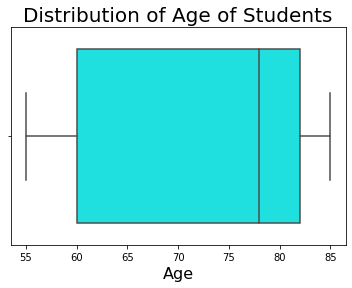

e:\programming\python\kagel_work\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


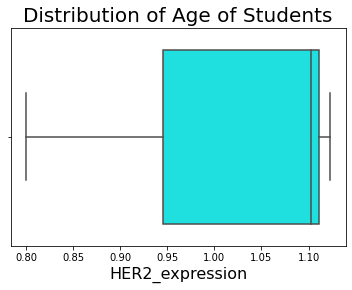

e:\programming\python\kagel_work\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: Horizontal orientation requires numeric `x` variable.

In [105]:
for col in features:
    x =data1[col]
    ax = sns.boxplot(x,color='#00ffff')
    ax.set_xlabel(xlabel = col, fontsize = 16)
    ax.set_title(label = 'Distribution of Age of Students', fontsize = 20)
    plt.show()

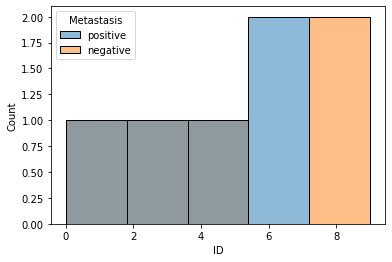

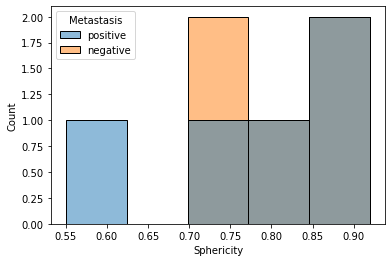

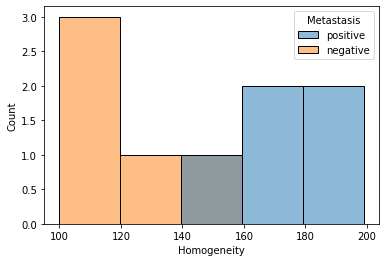

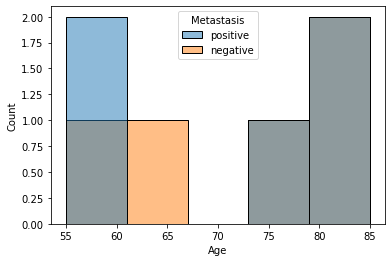

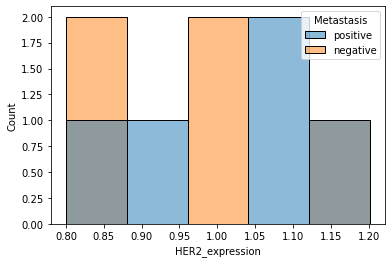

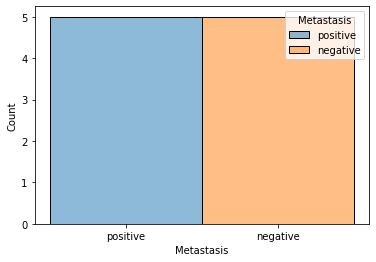

In [106]:
for col in features:
    sns.histplot(data=data, x=col, hue="Metastasis")
    plt.show()

<AxesSubplot:xlabel='Homogeneity', ylabel='Count'>

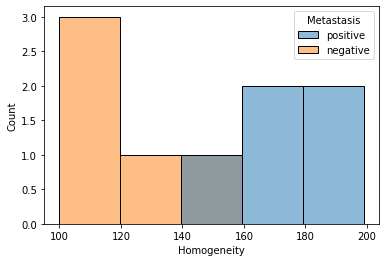